In [62]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [79]:
my_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Decision_Example2.csv", delimiter=",")
print(my_data.shape)
print(my_data)

(10, 5)
      Age Sex      BP Cholesterol Drug
0   Young   F    High      Normal    A
1   Young   F    High        High    A
2  Senior   M    High        High    A
3   Young   F  Normal      Normal    A
4  Senior   F  Normal        High    A
5  Senior   F  Normal      Normal    B
6  Senior   M    High      Normal    B
7   Young   M    High      Normal    B
8  Senior   M  Normal      Normal    B
9   Young   M  Normal        High    B


In [80]:
#Convert the data to arrays
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol']].values
X

array([['Young', 'F', 'High', 'Normal'],
       ['Young', 'F', 'High', 'High'],
       ['Senior', 'M', 'High', 'High'],
       ['Young', 'F', 'Normal', 'Normal'],
       ['Senior', 'F', 'Normal', 'High'],
       ['Senior', 'F', 'Normal', 'Normal'],
       ['Senior', 'M', 'High', 'Normal'],
       ['Young', 'M', 'High', 'Normal'],
       ['Senior', 'M', 'Normal', 'Normal'],
       ['Young', 'M', 'Normal', 'High']], dtype=object)

In [81]:
# Change Age to numbers
from sklearn import preprocessing
le_age = preprocessing.LabelEncoder()
le_age.fit(['Young','Senior'])
X[:,0] = le_age.transform(X[:,0])
X

array([[1, 'F', 'High', 'Normal'],
       [1, 'F', 'High', 'High'],
       [0, 'M', 'High', 'High'],
       [1, 'F', 'Normal', 'Normal'],
       [0, 'F', 'Normal', 'High'],
       [0, 'F', 'Normal', 'Normal'],
       [0, 'M', 'High', 'Normal'],
       [1, 'M', 'High', 'Normal'],
       [0, 'M', 'Normal', 'Normal'],
       [1, 'M', 'Normal', 'High']], dtype=object)

In [82]:
# Change Sex to numbers
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])
X

array([[1, 0, 'High', 'Normal'],
       [1, 0, 'High', 'High'],
       [0, 1, 'High', 'High'],
       [1, 0, 'Normal', 'Normal'],
       [0, 0, 'Normal', 'High'],
       [0, 0, 'Normal', 'Normal'],
       [0, 1, 'High', 'Normal'],
       [1, 1, 'High', 'Normal'],
       [0, 1, 'Normal', 'Normal'],
       [1, 1, 'Normal', 'High']], dtype=object)

In [67]:
# Change BP to numbers
from sklearn import preprocessing
le_bp = preprocessing.LabelEncoder()
le_bp.fit(['High', 'Normal'])
X[:,2] = le_bp.transform(X[:,2])
X[0:10]

array([[1, 0, 0, 'Normal'],
       [1, 0, 0, 'High'],
       [0, 1, 0, 'High'],
       [1, 0, 1, 'Normal'],
       [0, 0, 1, 'High'],
       [0, 0, 1, 'Normal'],
       [0, 1, 0, 'Normal'],
       [1, 1, 0, 'Normal'],
       [0, 1, 1, 'Normal'],
       [1, 1, 1, 'High']], dtype=object)

In [68]:
# Change Cholesterol to numbers
from sklearn import preprocessing
le_cho = preprocessing.LabelEncoder()
le_cho.fit(['High','Normal'])
X[:,3] = le_cho.transform(X[:,3])
X[0:10]

array([[1, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 1, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 1, 0, 1],
       [1, 1, 0, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0]], dtype=object)

In [70]:
# Check the Label
y = my_data["Drug"]
y

0    A
1    A
2    A
3    A
4    A
5    B
6    B
7    B
8    B
9    B
Name: Drug, dtype: object

In [71]:
#Let's split the date into training and test set
from sklearn.model_selection import train_test_split
#X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
X_trainset=X
y_trainset=y

In [72]:
print(X_trainset)

[[1 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 1 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 1]
 [1 1 0 1]
 [0 1 1 1]
 [1 1 1 0]]


In [73]:
#Build the tree
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
drugTree.fit(X_trainset,y_trainset)


DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [74]:
text_representation = tree.export_text(drugTree)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: A
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: B
|   |--- feature_0 >  0.50
|   |   |--- class: A
|--- feature_1 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: A
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: B
|   |--- feature_3 >  0.50
|   |   |--- class: B



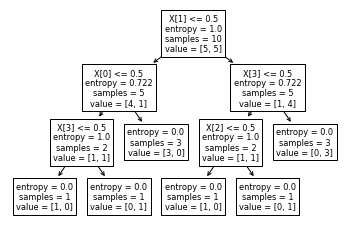

In [75]:
# show the tree
import matplotlib.pyplot as plt
tree.plot_tree(drugTree)
plt.show()